In [18]:
import os

In [19]:
%pwd

'c:\\Users\\louay\\OneDrive\\Documents\\Customer_churn\\Customer_churn'

In [20]:
os.chdir("../")

In [21]:
%pwd

'c:\\Users\\louay\\OneDrive\\Documents\\Customer_churn'

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import LabelEncoder

In [23]:

data=pd.read_csv("C:/Users/louay/OneDrive/Documents/Customer_churn/Customer_churn/artifacts/data_ingestion/churn/Customer-Churn-Records.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [24]:
data.shape

(10000, 18)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [26]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [27]:
data.isnull().sum() 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [28]:
cat_features = data.select_dtypes(include=['object','bool']).columns.tolist()
cat_features

['Surname', 'Geography', 'Gender', 'Card Type']

In [29]:
# Assuming 'data' is your DataFrame
data.columns = data.columns.str.replace(' ', '_')


In [30]:



# Mapping based on importance
card_type_mapping = {
    'DIAMOND': 1,    # Most important
    'PLATINUM': 2,
    'GOLD': 3,
    'SILVER': 4      # Least important
}

# Apply the mapping to the 'Card_Type' column
data['Card_Type_Encoded'] = data['Card_Type'].map(card_type_mapping)

# Mapping based on importance
gender_mapping = {
    'Male': 1,    # More important
    'Female': 0   # Less important
}

# Apply the mapping to the 'Gender' column
data['Gender_Encoded'] = data['Gender'].map(gender_mapping)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Card_Type,Point_Earned,Card_Type_Encoded,Gender_Encoded
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,1,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,1,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,1,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,3,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,3,2


In [31]:
# Assuming 'data' is your DataFrame
data.drop(['Surname', 'Geography','RowNumber','CustomerId','Gender','Card_Type'], axis=1,inplace=True)


In [32]:

data.head(20)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction_Score,Point_Earned,Card_Type_Encoded,Gender_Encoded
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,2
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,1,2
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,2
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,3,2
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,3,2
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,2,206,4,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,2,282,1,2
8,501,44,4,142051.07,2,0,1,74940.50,0,0,3,251,3,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,3,342,3,1


In [33]:
data.Card_Type.unique()

AttributeError: 'DataFrame' object has no attribute 'Card_Type'

In [ ]:
# Check the distribution of the 'Exited' column
class_distribution = data['Exited'].value_counts()

# Print the distribution
print("Class distribution in 'Exited' column:")
print(class_distribution)

# Calculate and print the percentage of each class
percentage_distribution = data['Exited'].value_counts(normalize=True) * 100
print("\nPercentage distribution in 'Exited' column:")
print(percentage_distribution)

# Check if the dataset is balanced
if len(class_distribution) == 2 and abs(class_distribution[0] - class_distribution[1]) < len(data) * 0.1:
    print("\nThe dataset is approximately balanced.")
else:
    print("\nThe dataset is imbalanced.")

Class distribution in 'Exited' column:
Exited
0    7962
1    2038
Name: count, dtype: int64

Percentage distribution in 'Exited' column:
Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

The dataset is imbalanced.


C:\Users\louay\AppData\Local\Temp\ipykernel_15056\1362039620.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = data['Exited'], palette="GnBu")


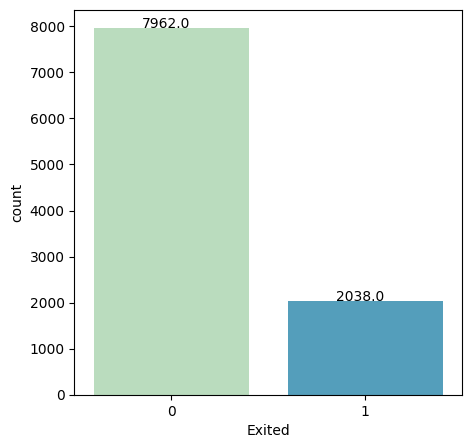

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Exited'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# Check the distribution of the 'Exited' column
class_distribution = data['Exited'].value_counts()
print("Class distribution in 'Exited' column:")
print(class_distribution)

Class distribution in 'Exited' column:
Exited
0    7962
1    2038
Name: count, dtype: int64


In [ ]:
# Determine the number of instances needed to balance
target_size = class_distribution.max()
add_samples = target_size - class_distribution.min()

print(f"Number of additional samples needed: {add_samples}")

Number of additional samples needed: 5924


In [34]:


# Assume `X` is your feature matrix and `y` is the target variable
X = data.drop(columns=['Exited'])
y = data['Exited']

# Encode categorical features if needed
# Example: X = pd.get_dummies(X)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['Exited'] = y_resampled

# Check the new distribution
print("\nBalanced class distribution in 'Exited' column:")
print(balanced_data['Exited'].value_counts())



Balanced class distribution in 'Exited' column:
Exited
1    7962
0    7962
Name: count, dtype: int64


In [37]:
balanced_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Point_Earned,Card_Type_Encoded,Gender_Encoded,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,2,1
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,1,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,2,1
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,3,2,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,3,2,0


In [48]:
data.shape

(10000, 14)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction_Score  10000 non-null  int64  
 11  Point_Earned        10000 non-null  int64  
 12  Card_Type_Encoded   10000 non-null  int64  
 13  Gender_Encoded      10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


C:\Users\louay\AppData\Local\Temp\ipykernel_27520\3312119556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = balanced_data['Exited'], palette="GnBu")


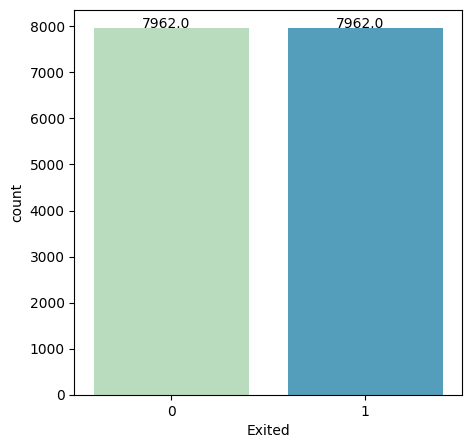

In [40]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = balanced_data['Exited'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

C:\Users\louay\AppData\Local\Temp\ipykernel_27520\4244824129.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=balanced_data['Card_Type_Encoded'], palette="GnBu")


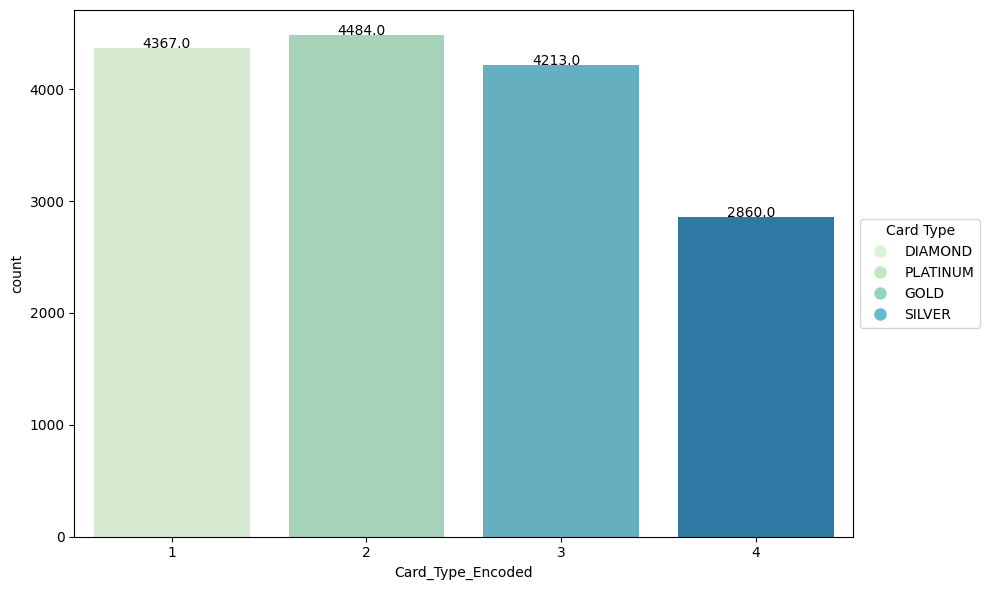

In [46]:
# Define the card type mapping
card_type_mapping = {
    'DIAMOND': 1,    # Most important
    'PLATINUM': 2,
    'GOLD': 3,
    'SILVER': 4      # Least important
}

# Reverse the mapping to use the encoded values as keys
reverse_mapping = {v: k for k, v in card_type_mapping.items()}

# Plot the count plot
plt.figure(figsize=(10, 6))  # Increase the figure size
ax = sns.countplot(x=balanced_data['Card_Type_Encoded'], palette="GnBu")

# Add annotations for the counts
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=reverse_mapping[val], 
                      markersize=10, markerfacecolor=sns.color_palette("GnBu")[i])
           for i, val in enumerate(sorted(reverse_mapping.keys()))]

plt.legend(handles=handles, title='Card Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

C:\Users\louay\AppData\Local\Temp\ipykernel_27520\1548844085.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=balanced_data['Gender_Encoded'], palette="GnBu")


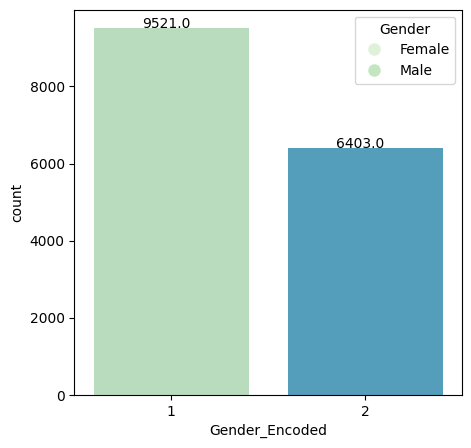

In [44]:
# Example encoded values mapping
gender_mapping = {0: 'Female', 1: 'Male'}

# Plot the count plot
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=balanced_data['Gender_Encoded'], palette="GnBu")

# Add annotations for the counts
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=gender_mapping[val], 
                      markersize=10, markerfacecolor=sns.color_palette("GnBu")[i])
           for i, val in enumerate(gender_mapping.keys())]

plt.legend(handles=handles, title='Gender', loc='upper right')

# Show plot
plt.show()